# 01.데이터 소개

이번 프로젝트는 고객이 이탈하지 않고 남아있는 생존율 분석입니다.

원래는 이 메디컬 분야에서 환자가 살아남을 가능성을 분석하는 목적으로 개발이 되었다가 지금은 여러분야에서 응용되어 사용중입니다.

이번 프로젝트에서 고객의 생존율을 예측하는 목적으로 사용해보겠습니다.
Survival Analysis는 여러 방법이 있습니다.

머신러닝보다는 좀 더 본질적인 통계학적 방법으로 접근하는 게 좀 더 기본적인 방법이고, 여기에 머신러닝을 입혀서 좀 더 발전한 모습의 패키지도 사용할 예정입니다.

사용할 데이터는 인터넷 서비스 관련된 데이터
고객들이 인터넷 서비스를 몇년 이용했는지? 부가적인 서비스를 어떤거를 이용했는지? 에 대한 변수들이 포함되어있습니다.

최종적으로 이 고객이 이탈을 했나? 안했나? 이것들을 기준으로 Survival Analysis 해보겠습니다.




## 1-1.컬럼 설명

  * **id** - 사용자 id
  * **is_tv_subscriber** - 기본적인 인터넷 서비스와 더불어 패키지로 tv 수신 패키지도 이용하는가?
  * **is_movie_package_subscriber** - 기본적인 인터넷 서비스와 더불어 패키지로 영화 패키지도 이용하는가?
  * **subscription_age** - 총 몇년동안 우리 서비스를 이용하고 있는가?
  * **bill_avg** - 평균적으로 월 얼마를 내고 있는지?
  * **service_failure_count** - 어떤 문제가 생겨서 서비스가 제대로 작동하지 않은 적이 몇번이나 있었는지?
  * **churn** - 생존했는 지 여부

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
net_df = pd.read_csv('/content/internet.csv')

In [3]:
net_df.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,service_failure_count,churn
0,15,1,0,12,25,0,0
1,18,0,0,8,0,0,1
2,23,1,0,9,16,0,1
3,27,0,0,7,21,1,1
4,34,0,0,6,0,0,1


In [4]:
net_df.info()
# null 값이 없다! 데이터 자체가 깔끔함!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63383 entries, 0 to 63382
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   id                           63383 non-null  int64
 1   is_tv_subscriber             63383 non-null  int64
 2   is_movie_package_subscriber  63383 non-null  int64
 3   subscription_age             63383 non-null  int64
 4   bill_avg                     63383 non-null  int64
 5   service_failure_count        63383 non-null  int64
 6   churn                        63383 non-null  int64
dtypes: int64(7)
memory usage: 3.4 MB


In [5]:
net_df.describe()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,service_failure_count,churn
count,6.338300e+04,63383.000000,63383.000000,63383.000000,63383.000000,63383.000000,63383.000000
mean,7.808240e+05,0.821309,0.338782,2.791758,19.469101,0.274727,0.565278
std,4.594616e+05,0.383097,0.473299,1.970525,13.232499,0.817178,0.495724
min,1.500000e+01,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,3.780955e+05,1.000000,0.000000,1.000000,14.000000,0.000000,0.000000
50%,7.834610e+05,1.000000,0.000000,2.000000,20.000000,0.000000,1.000000
75%,1.180696e+06,1.000000,1.000000,4.000000,23.000000,0.000000,1.000000
max,1.687085e+06,1.000000,1.000000,13.000000,406.000000,19.000000,1.000000


56.52% 정도의 고객이 떠났다는 것을 알 수 있다.

여기서는 서비스를 떠난 고객이 많고 적고의 문제가 아님.
데이터의 기간이 충분히 길다면 당연히 떠난 고객의 비율이 높아질 수 밖에 없음.

오히려 이 Survival Analysis 할때에는 이런 데이터들이 충분히 갖춰져야 좀 더 정확한 Survival Analysis 할 수있음.

가령 1년치를 수집해놨는 데 떠난 고객이 별로 없으면 우리가 이런 Survival Analysis 할 수 없음.

데이터가 충분히 긴 기간을 수집해야 한다는 것을 유념해야 함.

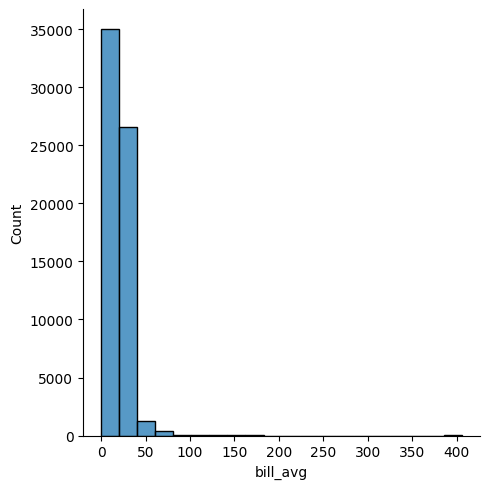

In [6]:
sns.displot(net_df['bill_avg'], bins = 20)

약 20~30 불 사이의 비용이 가장 많다.

400 불 부분에도 미세하게 데이터가 있는 것이 보인다.

<Axes: ylabel='bill_avg'>

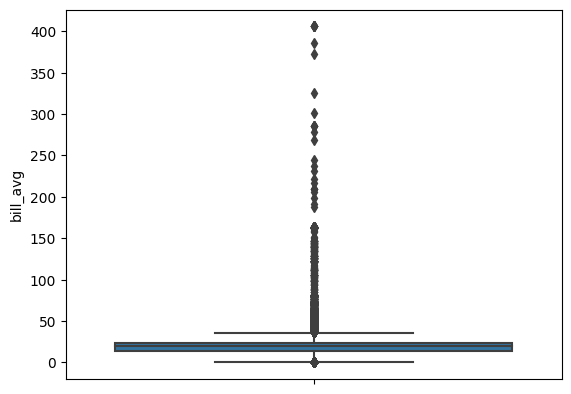

In [7]:
sns.boxplot(y=net_df['bill_avg'])

높은 비용을 지불하는 고객도 보인다. 확연히 동떨어진 데이터도 아니기에 아웃라이어라고 함부로 판단할 수 없다.

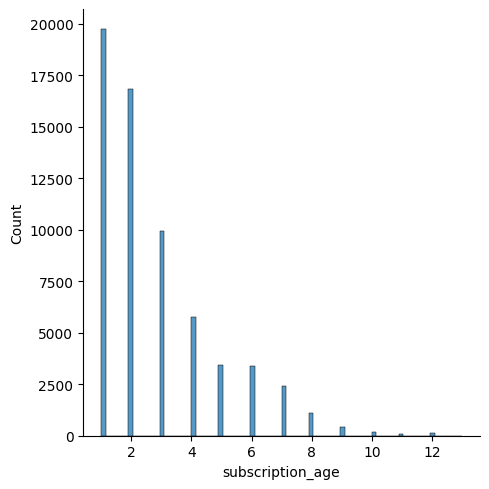

In [8]:
sns.displot(net_df['subscription_age'])

1년 이용한 고객이 가장 많고, 점점 줄어드는 경향을 볼 수 있다.

자연스럽게 떨어지기 때문에 12년치가 아웃라이어라고 보기는 힘들다.

# 2.결측치 확인

In [ ]:
net_df.isna().mean()

id                             0.0
is_tv_subscriber               0.0
is_movie_package_subscriber    0.0
subscription_age               0.0
bill_avg                       0.0
service_failure_count          0.0
churn                          0.0
dtype: float64

In [ ]:
net_df

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,service_failure_count,churn
0,15,1,0,12,25,0,0
1,18,0,0,8,0,0,1
2,23,1,0,9,16,0,1
3,27,0,0,7,21,1,1
4,34,0,0,6,0,0,1
...,...,...,...,...,...,...,...
63378,1685909,1,0,1,17,0,1
63379,1686040,1,0,1,9,1,1
63380,1686285,1,1,1,32,0,1
63381,1686606,1,1,1,20,2,1


Survival Analysis를 하는 데, subscription_age, churn 이 2개의 컬럼이 중요

나머지 컬럼은 있으면 좋고, 없어도 상관없긴 함.

id 컬럼은 사전에 drop 시켜주는 게 좋다.

사용하지 않을 거 같은 경우 빠른 시간 내 drop을 시킴.

Survival Analysis 같은 경우는 사실 안 해줘도 됨.

왜냐하면 나중에 사용할 모델링 패키지들이 데이터를 전체를 다 받는 게 아니라 특정 컬럼을 지정해줘야 함.

바로 위에 언급한 subscription_age, churn 이 주요 변수로 들어갈 것.

나머지 변수들은 패키지에 따라서 선택적으로 들어갈 수는 있음.
그래서 여기서 id를 굳이 드랍시키지 않암.

이런 것은 선택적으로 잘 판단 하여야 함.

지도 학습을 돌릴 경우 대부분의 경우 id 필요 없을 것!

특이 케이스로 Kmeans Clustering과 같은 비지도 학습의 경우 고객id를 기반으로 뭔가를 확인할 필요가 있을 때도 있다. 그럴 경우에는 id를 인덱스 부분에 숨겨넣는 경우 하나의 방법이 될 수 있다.





In [ ]:
net_df.set_index('id', inplace=True)

In [ ]:
net_df

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,service_failure_count,churn
id,,,,,,
15,1,0,12,25,0,0
18,0,0,8,0,0,1
23,1,0,9,16,0,1
27,0,0,7,21,1,1
34,0,0,6,0,0,1
...,...,...,...,...,...,...
1685909,1,0,1,17,0,1
1686040,1,0,1,9,1,1
1686285,1,1,1,32,0,1


# 3.모델링

In [ ]:
!pip install lifelines

In [ ]:
from lifelines import KaplanMeierFitter

colab에 기본적으로 지원하는 라이브러리들이 있고 지원하지 않는 것들이 있다.
lifelines의 경우 그렇게 많이 사용하는 라이브러리는 아니다.

In [ ]:
kmf = KaplanMeierFitter()

In [ ]:
kmf.fit(net_df['subscription_age'],net_df['churn'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 63383 total observations, 27554 right-censored observations>

In [ ]:
kmf.survival_function_

,KM_estimate
timeline,
0.0,1.000000
1.0,0.821829
2.0,0.600818
3.0,0.478825
4.0,0.387347
5.0,0.325399
6.0,0.275443
7.0,0.232923
8.0,0.194374


<Axes: xlabel='timeline', ylabel='KM_estimate'>

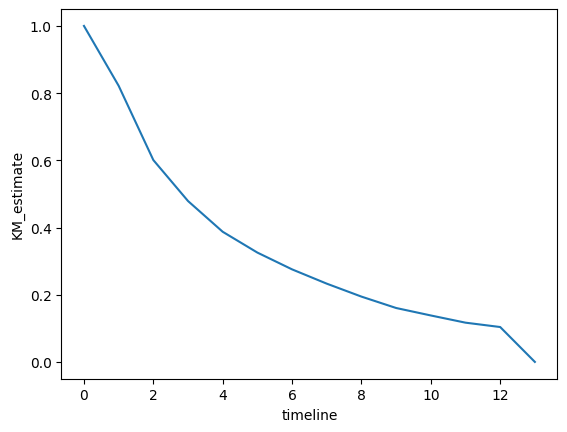

In [ ]:
sns.lineplot(x = kmf.survival_function_.index, y = kmf.survival_function_['KM_estimate'])

* 13년차의 데이터에서 값이 뚝 떨어지는 것을 볼 수 있다. 이런 경우는 데이터의 크기가 충분하지 않아서 생기는 경우이다.

* value_counts()를 통해서 데이터가 몇 건씩 있는 지 알아보자.

In [ ]:
net_df['subscription_age'].value_counts()

1     19739
2     16847
3      9953
4      5764
5      3446
6      3378
7      2401
8      1081
9       420
10      154
12      123
11       74
13        3
Name: subscription_age, dtype: int64

* 13년도에 3건밖에 없다. 이런 경우에는 드랍해주는 게 좋다고 판단.

In [ ]:
net_df[net_df['subscription_age'] == 13]

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,service_failure_count,churn
id,,,,,,
2005,1,1,13,0,0,1
4263,0,0,13,0,0,1
6171,1,1,13,10,0,1


* 3개 모두 churn이 1로 고객들이 모두 떠난다는 걸 알 수 있다. 즉, 100% 다 이탈한다. 라고 추정이 될 수 밖에 없다.

* 13년도 데이터를 빼도록 하자!

In [ ]:
new_net_df = net_df[net_df['subscription_age'] < 13]

In [ ]:
kmf.fit(new_net_df['subscription_age'], new_net_df['churn'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 63380 total observations, 27554 right-censored observations>

In [ ]:
kmf.survival_function_

,KM_estimate
timeline,
0.0,1.000000
1.0,0.821821
2.0,0.600797
3.0,0.478794
4.0,0.387306
5.0,0.325348
6.0,0.275380
7.0,0.232839
8.0,0.194242


* 13년이 제외된 결과가 나온다 시각화로도 확인해보자!

<Axes: xlabel='timeline', ylabel='KM_estimate'>

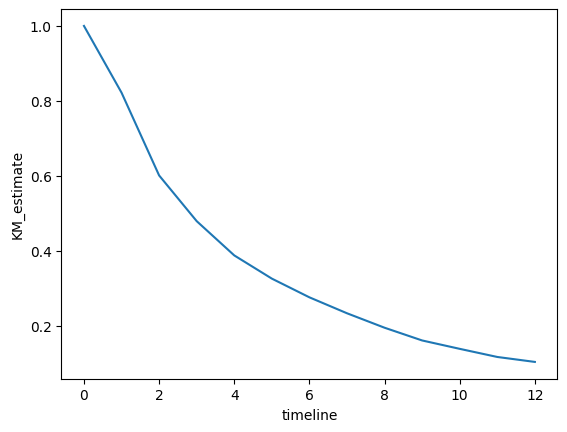

In [ ]:
sns.lineplot(x = kmf.survival_function_.index, y = kmf.survival_function_['KM_estimate'])

# 4.생존율 분석

**event_table**

event_at : 시간 ( 연 단위 )

removed : 다음 시간으로 가면서 빠진 인원의 수 ( observed 와 censored 의 합을 나타낸다. )

observed : 제외되는 데이터. 즉, 우리가 churn이라고 인식하는 Value (ex 이탈한 고객, 사망한 환자)
    

censored : 더이상 데이터를 수집하지는 않았으나 이 고객이 이탈하지 않은 케이스.
즉, 앞으로 지속적으로 데이터를 수집한다면 수집이 됬을 Value

entrance : 몇 명이 들어왔는지?

at_risk : 해당 연차에 남아있는 전체 인원


In [ ]:
kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,63380,63380
1.0,19739,11293,8446,0,63380
2.0,16847,11737,5110,0,43641
3.0,9953,5441,4512,0,26794
4.0,5764,3218,2546,0,16841
5.0,3446,1772,1674,0,11077
6.0,3378,1172,2206,0,7631
7.0,2401,657,1744,0,4253
8.0,1081,307,774,0,1852


* survived rate를 구할 때에는 observed 만 영향을 끼치고, censored 데이터는 영향을 끼치지 않음.

* survived rate를 구하기 위해서는 Hazard rate이란 것을 구해야 한다.

    Hazard rate = observed / at_risk

    survived rate = ( 1 - Hazard rate ) * ( 직전의 survived rate )
    

여기까지만 해도 survived analysis를 하는 데에는 문제 없다.

# 5.CoxPH

CoxPH : 조금 더 발전된 형태의 알고리즘

* 이전 알고리즘과의 차이

subscription_age, churn 외의 다른 변수들도 학습 결과에 영향을 끼침
따라서 id가 만약 컬럼 안에 들어있다면 drop을 해줘야 함.

그리고 어느 특정 변수들은 포함을 시키고 싶지 않다면, 미리 drop을 해주는 게 좋다.

In [ ]:
from lifelines import CoxPHFitter

In [ ]:
# 특정한 이름으로 속성 부여
cph = CoxPHFitter()

In [ ]:
new_net_df.head()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,service_failure_count,churn
id,,,,,,
15,1,0,12,25,0,0
18,0,0,8,0,0,1
23,1,0,9,16,0,1
27,0,0,7,21,1,1
34,0,0,6,0,0,1


In [ ]:
cph.fit(new_net_df,'subscription_age','churn')

<lifelines.CoxPHFitter: fitted with 63380 total observations, 27554 right-censored observations>

In [ ]:
cph.baseline_survival_

,baseline survival
1.0,0.854525
2.0,0.670724
3.0,0.553287
4.0,0.457593
5.0,0.388855
6.0,0.330978
7.0,0.280547
8.0,0.235377
9.0,0.196422
10.0,0.170723


이전 알고리즘과 결과가 다르게 나온 것을 확인할 수 있다.

-> 두 개의 변수 이외에도 같이 예측을 하는 데 참여를 함. 그러므로 결과과 달라짐.
baseline이란 말이 붙여진 이유는 각 고객마다 각 변수에 대한 케이스가 다름.

누구는 is_movie_package_subscriber를 할 수도 있고, 누구는 bill_avg이 높을 수도 있고 0일 수도 있다. 이런 경우를 전반적으로 고려해서 평균적으로 survived_rate을 계산을 하면 위와 같은 결과가 나오게 되는 것이다.

In [ ]:
# 변수들의 영향도를 살펴보자
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 63380 total observations, 27554 right-censored observations>
             duration col = 'subscription_age'
                event col = 'churn'
      baseline estimation = breslow
   number of observations = 63380
number of events observed = 35826
   partial log-likelihood = -364702.94
         time fit was run = 2023-12-02 15:53:44 UTC

---
                              coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                           
is_tv_subscriber             -0.65       0.52       0.01            -0.67            -0.62                 0.51                 0.54
is_movie_package_subscriber  -0.76       0.47       0.01            -0.79            -0.74                 0.45                 0.48
bill_avg                     -0.01       0.99       0.00            -0.01            -0.00                 0.99                 1.00
service_failure_count         0.03       1.03       0.01             0.01             0.04                 1.01                 1.04

                              cmp to      z      p   -log2(p)
covariate                                                    
is_tv_subscriber                0.00 -52.55 <0.005        inf
is_movie_package_subscriber     0.00 -55.31 <0.005        inf
bill_avg                        0.00 -11.78 <0.005     104.01
service_failure_count           0.00   4.03 <0.005      14.11
---
Concordance = 0.65
Partial AIC = 729413.88
log-likelihood ratio test = 8926.45 on 4 df
-log2(p) of ll-ratio test = inf

coef 는 hazard_rat에 대한 숫자를 나타냄 예를 들어 service_failure_count가 한건씩 높아질 때 마다 hazard_rate이 3%씩 높아진다. 또 is_tv_subscriber는 0일때 보다 1일때 48% 정도 hazard_rate은 낮아지고. survived_rate은 높아진다.

<Axes: xlabel='log(HR) (95% CI)'>

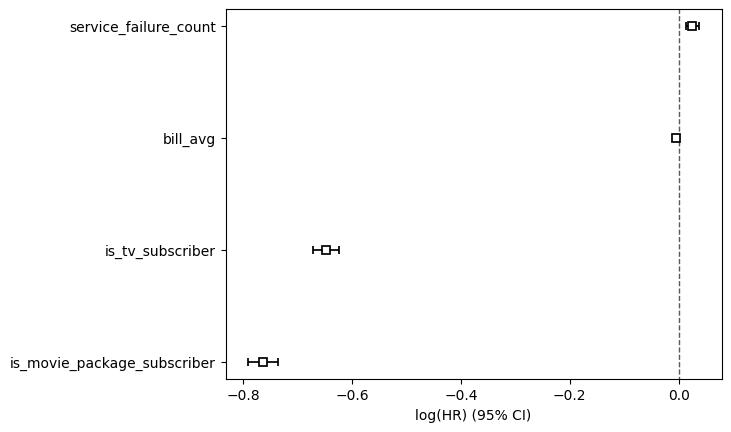

In [ ]:
cph.plot()

<Axes: >

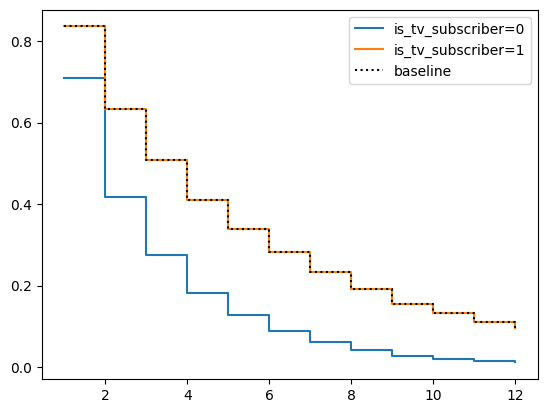

In [ ]:
cph.plot_partial_effects_on_outcome(covariates = 'is_tv_subscriber',values=[0,1])

baseline은 구독하고 있는 케이스랑 같은 수치의 survived_rate를 보여주고 있음.

즉, 이 시각화를 통해 구독을 하고 있는 경우와 안 하고 있는 경우의 survived_rate이 어떻게 되는 지를 한 눈에 확인할 수 있다.

<Axes: >

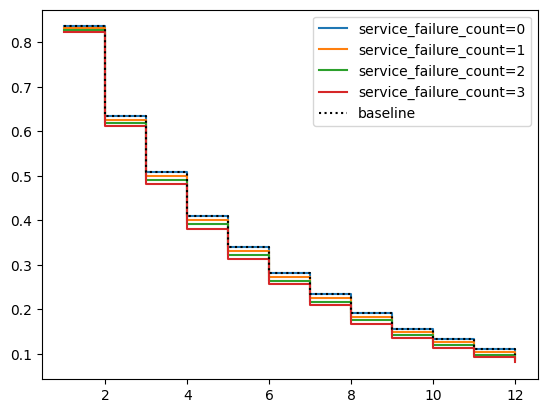

In [ ]:
cph.plot_partial_effects_on_outcome(covariates = 'service_failure_count',values=[0,1,2,3])

아까보다는 미세한 차이이지만 service_failure_count가 커질수록 즉, 빨간색에서 더 낮은 survived_rate을 보이는 것을 알 수 있다.

## 5-1.예측하는 기능

고객 한명한명의 survived_rate을 예측해보자.

In [ ]:
new_net_df.head()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,service_failure_count,churn
id,,,,,,
15,1,0,12,25,0,0
18,0,0,8,0,0,1
23,1,0,9,16,0,1
27,0,0,7,21,1,1
34,0,0,6,0,0,1


id가 18인 경우를 보면 survived_rate이 확연히 낮다.

-> is_tv_subscriber, is_movie_package_subscriber 다른 변수가 0인 것이 큰 영향을 끼쳤다고 판단.

In [ ]:
cph.predict_survival_function(new_net_df)

,15,18,23,27,34,56,71,84,94,112,...,1685573,1685611,1685613,1685640,1685779,1685909,1686040,1686285,1686606,1687085
1.0,0.839447,0.683323,0.832438,0.704602,0.683323,0.924365,0.706971,0.695517,0.683323,0.683323,...,0.917671,0.827614,0.837141,0.706971,0.916015,0.833230,0.822790,0.924365,0.915720,0.834805
2.0,0.641065,0.380068,0.627554,0.410862,0.380068,0.818887,0.414380,0.397536,0.380068,0.380068,...,0.803904,0.618356,0.636599,0.414380,0.800225,0.629072,0.609240,0.818887,0.799570,0.632096
3.0,0.517420,0.238443,0.501341,0.267624,0.238443,0.743711,0.271027,0.254862,0.238443,0.238443,...,0.723635,0.490491,0.512087,0.271027,0.718733,0.503140,0.479813,0.743711,0.717861,0.506728
4.0,0.418825,0.150531,0.401721,0.175329,0.150531,0.676310,0.178280,0.164371,0.150531,0.150531,...,0.652301,0.390278,0.413134,0.178280,0.646471,0.403626,0.379095,0.676310,0.645436,0.407432
5.0,0.349411,0.101485,0.332245,0.122016,0.101485,0.623420,0.124501,0.112863,0.101485,0.101485,...,0.596781,0.320844,0.343682,0.124501,0.590341,0.334149,0.309770,0.623420,0.589200,0.337960
6.0,0.292027,0.068687,0.275304,0.085221,0.068687,0.575131,0.087256,0.077786,0.068687,0.068687,...,0.546469,0.264277,0.286430,0.087256,0.539573,0.277151,0.253631,0.575131,0.538351,0.280855
7.0,0.242940,0.046024,0.227018,0.058973,0.046024,0.529481,0.060595,0.053099,0.046024,0.046024,...,0.499263,0.216598,0.237596,0.060595,0.492028,0.228770,0.206598,0.529481,0.490748,0.232288
8.0,0.199813,0.030082,0.184977,0.039889,0.030082,0.484963,0.041140,0.035399,0.030082,0.030082,...,0.453589,0.175345,0.194818,0.041140,0.446115,0.186603,0.166162,0.484963,0.444794,0.189872
9.0,0.163362,0.019408,0.149781,0.026660,0.019408,0.442996,0.027603,0.023308,0.019408,0.019408,...,0.410885,0.141035,0.158775,0.027603,0.403276,0.151263,0.132752,0.442996,0.401933,0.154247
10.0,0.139753,0.013819,0.127179,0.019509,0.013819,0.412985,0.020260,0.016860,0.013819,0.013819,...,0.380575,0.119134,0.135495,0.020260,0.372926,0.128546,0.111554,0.412985,0.371577,0.131304
